This question builds on the studio assignment you did in class on August 21 to examine some modeling pitfalls. 
We'll see examples of how both classical inference and how machine learning-based modeling can fail.

First, we'll just run the code from studio to get back to where we were.

In [2]:
#We'll need to install the nbformat package to run one notebook from another
!pip install nbformat

In [ ]:
#Run your completed studio notebook by updating the path below and executing this cell. Then you'll have access to all the results and variables from that notebook. 
%run /path/to/your/studio1_notebook.ipynb

#### Interpolation and extrapolation:

Often, the reason we build a model is to predict something about the world. Two examples of this application are interpolation and extrapolation. 

Interpolation is when we predict values for a new point that lies inside the range represented by the data.

In extrapolation, we predict values for a point outside the range of our data. 
In general, extrapolation is much more "dangerous" than interpolation, and gets more risky the further you go from your initial data range. 

In general, the more parameters your model has, the more risk there is of ``over-fitting": matching every data point well in your initial training/fitting sample, but being very incorrect about new data. This is a risk in both classical inference and ML.

Let's see what this looks like. 


First, try interpolating and extrapolating using the "correct" model, which we developed from our understanding of the physics underlying our data. Test how the linear models perform on four points: t= 2.5s, t = 12s, t = 20s, and t = 40s. Check the percent error/disagreement between the two linear models at each point. 

In [7]:
#Your code here: check what the traditional inference linear models predict at t={2.5, 12, 20}s. Give the percent error between the models with and without taking uncertainty into account. 

Comment on what you found: how big do the errors get? What trend(s) do you observe?

### Model error and extrapolation
Extrapolation can be really dangerous, though, when we have the wrong model. Imagine we didn't have a physical model for this data, or we somehow had the wrong model; let's see what happens. We'll try two incorrect models: a quadratic polynomial and a cubic polynomial.
This time, instead of fitting "by hand" with a grid search, we'll use scipy's curve_fit method. To use it, we'll need to import the package and define our fit functions. 

The two functions we'll test are:
$$ f(x)= a+bx+cx^2 $$

$$ g(x)= a+bx+cx^2+dx^3 $$

with the fit having free parameters $a, b, c$ in both cases, and $d$ as an additional free parameter in the cubic case.




In [5]:
from scipy.optimize import curve_fit

In [ ]:
# Define your fitting functions here. I'll get you started
def quad(x, a, b, c):
    return #your code here

#your cubic function definition here

Take a look at the scipy $\texttt{curve\_fit}$ method documentation (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) to see how to run the fit and return the parameters. Run a fit over the original data set of 10 points for each of the two new functions. 


Once you have the parameters, use them to find the mean squared error for that original data set. 

Hint: numpy's $\texttt{mean}$ function will probably be useful here.

In [ ]:
#Run fits for the quadratic and cubic functions, return and store the parameters for each.

In [ ]:
#Using the stored parameters, find the mean squared error for the two new models, and compare them to the mean squared error of the linear fit (the one that did not use the uncertainties). 

Give the MSE for each model. Simply based on the mean squared errors, which model appears to perform the best?

Let's plot the results of our fits in the range where the fit was done. To do this, we'll need to evaluate at some more points.

In [ ]:
xs = np.linspace(0, 10, 1000) #make 1000 points between 0 and 10
ys = bestb + bestm*xs #linear fit y values
ys_quad = #your code here
ys_cubic = #your code here

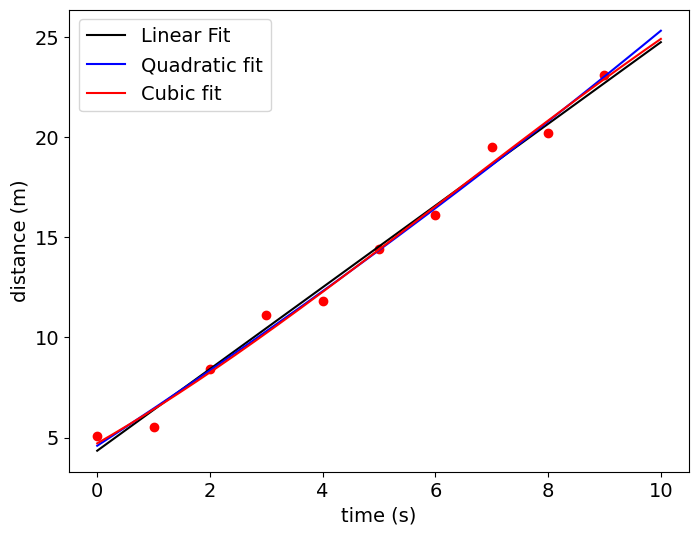

In [19]:
plt.figure(figsize=(8,6))

plt.scatter(x,y, marker = 'o', c = 'red')

plt.plot(xs, ys, c = 'black', label = 'Linear Fit')

plt.plot(xs, ys_quad, c = 'blue', label = 'Quadratic fit')
#plt.plot(xval, y_quad_extravals, c = 'green', marker = "+", linestyle = ' ')

plt.plot(xs, ys_cubic, c = 'red', label = 'Cubic fit')
#plt.plot(xval, y_cubic_extravals, c = 'red', marker = "+", linestyle = ' ')

plt.xlabel('time (s)')

plt.ylabel('distance (m)')

plt.legend();

Now, let's try interpolating and extrapolating with the quadratic and cubic models. Evalaute them at the same four points as before: t= 2.5s, t = 12s, t = 20s, and t = 40s. Check the percent error/disagreement between each of the new models and the linear model without uncertainty at each point. 

In [ ]:
#Evaluate the quadratic and cubic models you fit above at the four test points

In [23]:
#Find the percent error for each of the 4 test points in the quadratic and cubic models, relative to the linear model without uncertainty

Comment on what you found: how big do the errors get? What trend(s) do you observe? Give at least two observations. 


Plot your results in a window including the broader extrapolation range, from t = 0 to ~50. Plot the linear models without uncertainties for comparison.

In [ ]:
# Code to make the new plot.

It's often stated as a general "rule" that you should never extrapolate based on a polynomial fit. What do you think of this guideline? Explain your reasoning. 

### Interpolating and Extrapolating with Machine Learning
Finally, we'll check how the two ML models we trained in studio, the Decision Tree Regression and Linear Regression models, perform in interpolation and extrapolation. Test both models at the same 4 points: t= 2.5s, t = 12s, t = 20s, and t = 40s. Check the percent error/disagreement between each of the ML models and the linear model without uncertainty at each point. 

In [ ]:
#Using the models you trained in the studio notebook, evaluate the model predictions for the 4 interpolation and extrapolation test points. You may want to go back to the studio notebook to remind yourself how to use the predict function.

In [29]:
#Find the percent error for each of the 4 test points in the two ML models, relative to the linear model without uncertainty

Comment on what you found: how big do the errors get? What trend(s) do you observe, if any? 

Using your trained ML models, draw a plot of their behavior in the broader range, t = 0 to ~50. Plot the linear model without uncertainty for comparison. You'll need to make more predictions to have enough points for a nice-looking plot.

In [31]:
#Code to make more predictions and plot the results.

Now that you've made the plot, you may have a better idea of what's happening when we try to extrapolate from the ML models. What do you observe about the behavior of each model when it's applied to points with feature values outside the training domaain?

In this notebook, you tested interpolation and extrapolation performance of:
1. The "physically motivated" inference models (linear models)
2. Classical inference-based models with an incorrect underlying model (quadratic and cubic polynomial models)
3. A machine learning decision tree regression model
4. A machine learning linear regression model


Compare the performance in interpolation between these options. 

Compare the performance in extrapolation between these options.

What does this tell us about the overall strengths and weaknesses of these methods, and when we may want to use them?